In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_excel("/content/dd342e37-a96d-45de-a303-b47385d308ac.xlsx")
df.head()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,radius_se,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,diagnosis
0,17.99,10.38,122.80,0.11840,0.27760,0.3001,1.0950,0.9053,8.589,0.006399,0.04904,0.05373,M
1,20.57,17.77,132.90,0.08474,0.07864,0.0869,0.5435,0.7339,3.398,0.005225,0.01308,0.01860,M
2,19.69,21.25,130.00,0.10960,0.15990,0.1974,0.7456,0.7869,4.585,0.006150,0.04006,0.03832,M
3,11.42,20.38,77.58,0.14250,0.28390,0.2414,0.4956,1.1560,3.445,0.009110,0.07458,0.05661,M
4,20.29,14.34,135.10,0.10030,0.13280,0.1980,0.7572,0.7813,5.438,0.011490,0.02461,0.05688,M


In [ ]:
for cat in df.select_dtypes(include=["object"]).columns:
  df[cat]=LabelEncoder().fit_transform(df[cat])


In [ ]:
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [ ]:
#scaler=StandardScaler()
#scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#model=SVC(kernel="rbf",random_state=42)
model=RandomForestClassifier(n_estimators=100,criterion="gini",random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.956140350877193
confusion matrix: [[68  3]
 [ 2 41]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#model=SVC(kernel="rbf",random_state=42)
model=DecisionTreeClassifier(criterion="gini",random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.8859649122807017
confusion matrix: [[60 11]
 [ 2 41]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.85      0.90        71
           1       0.79      0.95      0.86        43

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.88       114
weighted avg       0.90      0.89      0.89       114



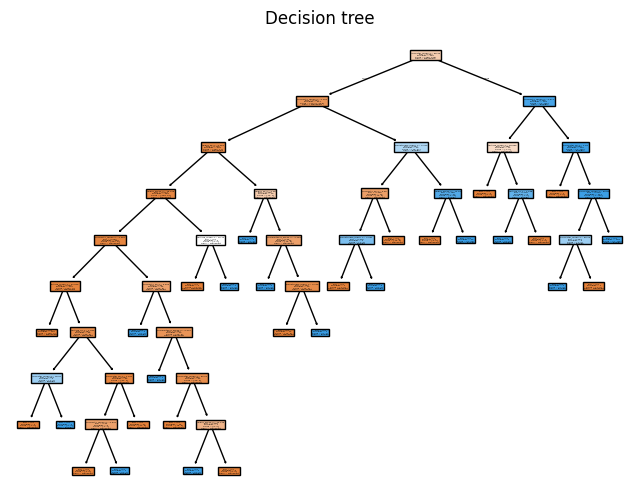

In [ ]:
plt.figure(figsize=(8,6))
plot_tree(model,filled=True,feature_names=df.columns,class_names=["Malignant","Benign"])
plt.title("Decision tree")
plt.xlabel("Features")
plt.ylabel("Target names")
plt.show()

In [ ]:
importance=model.feature_importances_
features=X.columns

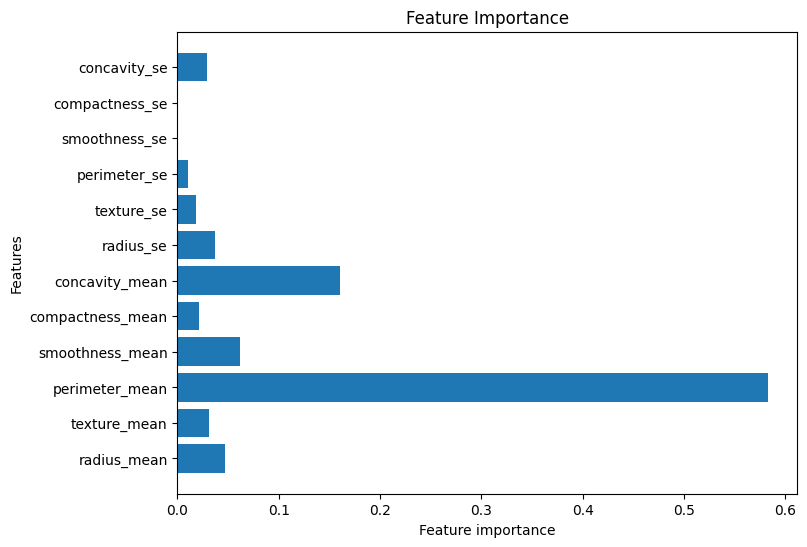

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(features,importance)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#model=SVC(kernel="rbf",random_state=42)
model=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=50,random_state=42),n_estimators=10,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.9736842105263158
confusion matrix: [[69  2]
 [ 1 42]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
model=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.9649122807017544
confusion matrix: [[69  2]
 [ 2 41]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.9385964912280702
confusion matrix: [[65  6]
 [ 1 42]]
classification report:               precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.88      0.98      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=100,learning_rate=0.1,eval_metric="logloss",random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.9649122807017544
confusion matrix: [[68  3]
 [ 1 42]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#model=SVC(kernel="rbf",random_state=42)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))

Accuracy: 0.9239766081871345
confusion matrix: [[103   5]
 [  8  55]]
classification report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



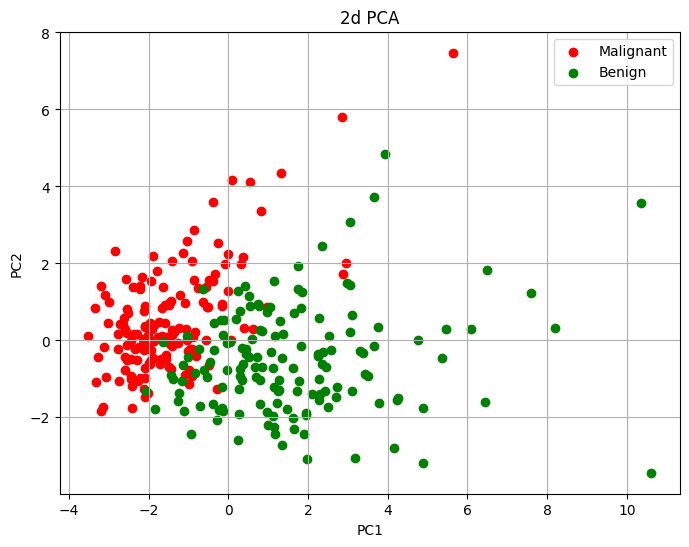

Explained variance ratio: [0.45676784 0.18007704]


In [ ]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
#Load the Data
#iris=load_iris()
breast_cancer=pd.read_excel("/content/dd342e37-a96d-45de-a303-b47385d308ac.xlsx",nrows=300)
breast_cancer.dropna(inplace=True)
for col in breast_cancer.select_dtypes(include=["object"]).columns:
  breast_cancer[col]=LabelEncoder().fit_transform(breast_cancer[col])
X=breast_cancer.drop("diagnosis",axis=1)
y=breast_cancer["diagnosis"]
target_names=["Malignant","Benign"]
X_scaled=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)
pca_df=pd.DataFrame(data=x_pca,columns=["PC1","PC2"])
pca_df['target']=y
colors=["r","g","b"]
plt.figure(figsize=(8,6))
for i,color,label in zip([0,1,2],colors,target_names):
        plt.scatter(pca_df.loc[pca_df["target"]==i,"PC1"],pca_df.loc[pca_df["target"]==i,"PC2"],color=color,label=label)
plt.title("2d PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()
print("Explained variance ratio:",pca.explained_variance_ratio_)



In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=8ba24077c5658a450b145c5533f335e21c877c9eb578824b4b504027bc85a8a2
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


bartlett's chisquare value:10612.779977395168
p value:0.0
kmo model:0.6540420035452765
eigen values:[5.49965553e+00 2.11869412e+00 1.41457304e+00 1.02585025e+00
 7.74364402e-01 4.33225180e-01 3.32454714e-01 2.43663553e-01
 1.03104865e-01 3.20996125e-02 2.21202430e-02 1.94504807e-04]


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


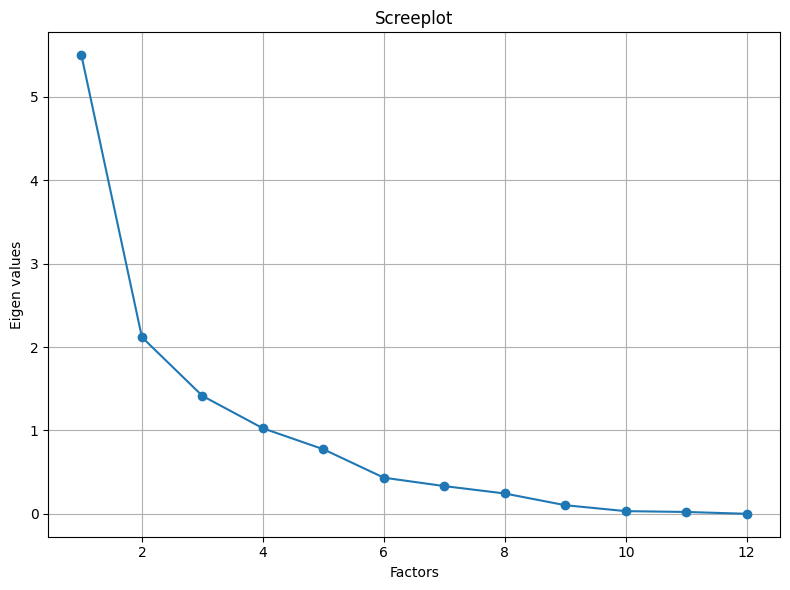

Factor Loadings:
                         0         1         2         3
radius_mean       0.902254  0.166164  0.045003 -0.321301
texture_mean      0.360796  0.153661 -0.149783  0.189035
perimeter_mean    0.904770  0.209020  0.074362 -0.312774
smoothness_mean   0.118572  0.225010  0.912315  0.098315
compactness_mean  0.407908  0.685729  0.482062 -0.052029
concavity_mean    0.588236  0.697283  0.315192 -0.054939
radius_se         0.850801  0.141892  0.182265  0.299776
texture_se        0.097301  0.099603 -0.079547  0.652074
perimeter_se      0.840012  0.201559  0.170116  0.290988
smoothness_se    -0.104625  0.173837  0.259328  0.593209
compactness_se    0.148390  0.880882  0.108686  0.252299
concavity_se      0.142809  0.803616  0.047954  0.200080


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
import matplotlib.pyplot as plt
data=pd.read_excel("/content/dd342e37-a96d-45de-a303-b47385d308ac.xlsx").drop("diagnosis",axis=1)
"""data=pd.DataFrame({
'Anxiety1': [2, 3, 4, 5, 3, 2, 4, 5],
'Anxiety2': [3, 4, 4, 5, 3, 3, 4, 5],
'Anxiety3': [2, 3, 4, 4, 2, 3, 5, 5],
'Motivation1': [4, 5, 4, 3, 4, 5, 3, 2],
'Motivation2': [5, 4, 4, 3, 4, 5, 3, 2],
'Motivation3': [4, 5, 4, 2, 4, 5, 3, 2],
'Confidence1': [5, 4, 3, 3, 4, 4, 3, 3],
'Confidence2': [4, 4, 3, 3, 4, 3, 3, 3]
})"""
data.dropna(inplace=True)
chi_square_value,p_value=calculate_bartlett_sphericity(data)
print(f"bartlett's chisquare value:{chi_square_value}")
print(f"p value:{p_value}")
kmo_all,kmo_model=calculate_kmo(data)
print(f"kmo model:{kmo_model}")
fa=FactorAnalyzer(rotation=None)
fa.fit(data)
ev,_=fa.get_eigenvalues()
print(f"eigen values:{ev}")
plt.figure(figsize=(8,6))
plt.plot(range(1,len(ev)+1),ev,marker="o")
plt.title("Screeplot")
plt.xlabel("Factors")
plt.ylabel("Eigen values")
plt.tight_layout()
plt.grid(True)
plt.show()
fa=FactorAnalyzer(n_factors=4,rotation="varimax")
fa.fit(data)
loadings=pd.DataFrame(fa.loadings_,index=data.columns)
print("Factor Loadings:")
print(loadings)

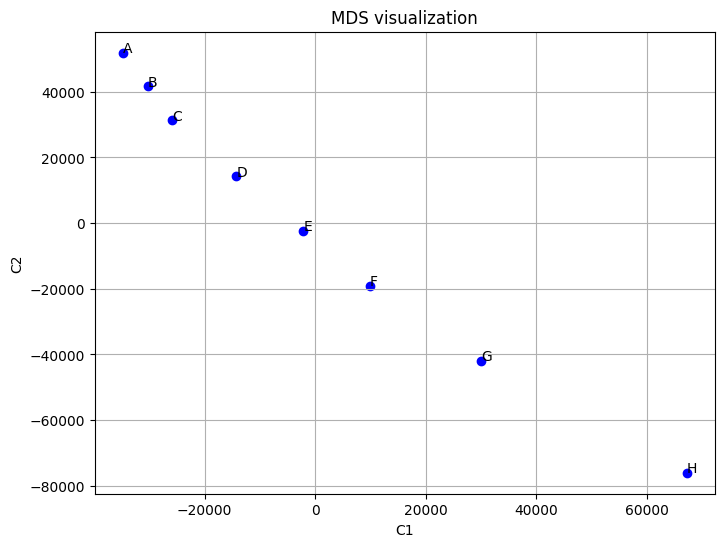

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
"""data=pd.DataFrame({
'Math': [80, 95, 70, 50, 60],
'Science': [85, 90, 65, 55, 70],
'English': [78, 88, 72, 50, 65]
}, index=['A', 'B', 'C', 'D', 'E'])"""
data=pd.read_csv("/content/bankloan.csv")
data.index=["A","B","C","D","E","F","G","H"]
dist_mat=pairwise_distances(data,metric="euclidean")
mds=MDS(n_components=2,dissimilarity='precomputed',random_state=42)
mds_coords=mds.fit_transform(dist_mat)
plt.figure(figsize=(8,6))
plt.scatter(mds_coords[:,0],mds_coords[:,1],color="blue")
for i,label in enumerate(data.index):
    plt.text(mds_coords[i,0]+0.2,mds_coords[i,1]+0.2,label)
plt.title("MDS visualization")
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()


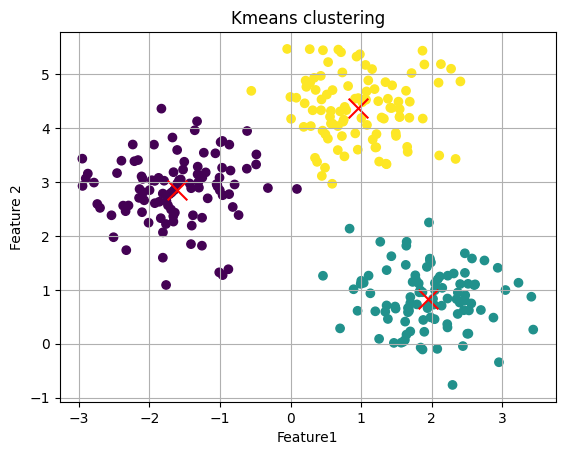

In [ ]:
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, _=make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],s=200,c='r', marker='x')
plt.title("Kmeans clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


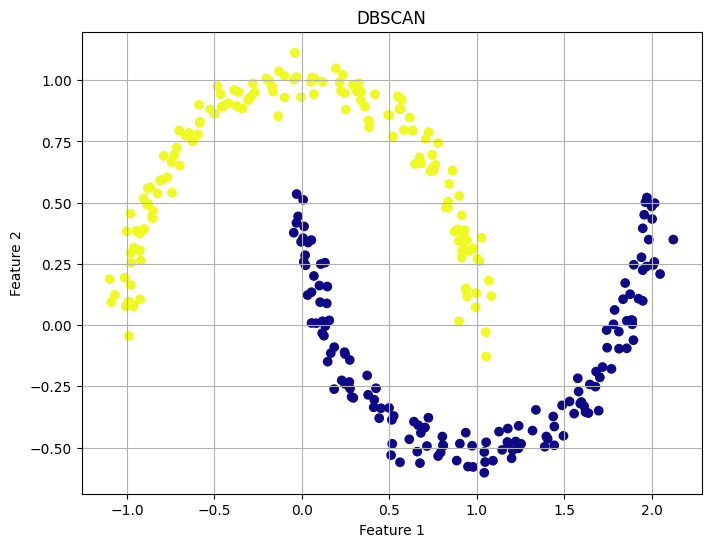

Number of clusters:2
Number of noise points:0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X,_=make_moons(n_samples=300,noise=0.05,random_state=0)
db=DBSCAN(eps=0.2,min_samples=5)
labels=db.fit_predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=labels,cmap="plasma")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
print(f"Number of clusters:{n_clusters}")
print(f"Number of noise points:{n_noise}")

Accuracy Score: 0.9777777777777777
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



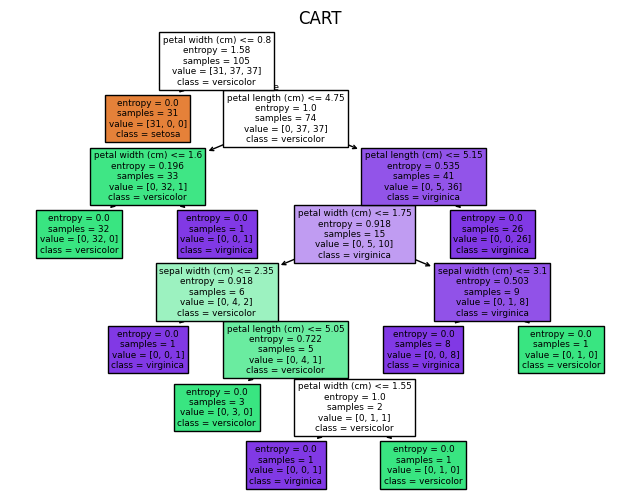

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification report:",classification_report(y_test,y_pred))
plt.figure(figsize=(8,6))
plot_tree(model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title("CART")
plt.grid(True)
plt.show()

In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
transaction=[
['milk', 'bread', 'eggs'],
['milk', 'bread'],
['milk', 'eggs'],
['bread', 'eggs'],
['milk', 'bread', 'eggs'],
['bread']
]
te=TransactionEncoder()
te_data=te.fit_transform(transaction)
df=pd.DataFrame(te_data,columns=te.columns_)
frequent_itemsets=apriori(df,min_support=0.4,use_colnames=True)
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
print("frequent itemsets:")
print(frequent_itemsets)
print("association rules")
print(rules[["antecedents","consequents","support","confidence","lift"]])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

frequent itemsets:
    support       itemsets
0  0.833333        (bread)
1  0.666667         (eggs)
2  0.666667         (milk)
3  0.500000  (bread, eggs)
4  0.500000  (bread, milk)
5  0.500000   (milk, eggs)
association rules
  antecedents consequents  support  confidence   lift
0      (eggs)     (bread)      0.5        0.75  0.900
1      (milk)     (bread)      0.5        0.75  0.900
2      (milk)      (eggs)      0.5        0.75  1.125
3      (eggs)      (milk)      0.5        0.75  1.125


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
transaction=[
['milk', 'bread', 'eggs'],
['milk', 'bread'],
['milk', 'eggs'],
['bread', 'eggs'],
['milk', 'bread', 'eggs'],
['bread']
]
te=TransactionEncoder()
te_data=te.fit_transform(transaction)
df=pd.DataFrame(te_data,columns=te.columns_)
frequent_itemsets=fpgrowth(df,min_support=0.4,use_colnames=True)
print("frequent itemsets:")
print(frequent_itemsets)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

frequent itemsets:
    support       itemsets
0  0.833333        (bread)
1  0.666667         (milk)
2  0.666667         (eggs)
3  0.500000  (bread, milk)
4  0.500000   (milk, eggs)
5  0.500000  (bread, eggs)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
df=pd.read_excel("/content/dd342e37-a96d-45de-a303-b47385d308ac.xlsx",nrows=300)
df.dropna(inplace=True)
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]
for col in df.select_dtypes(include=["object"]).columns:
    df[col]=LabelEncoder().fit_transform(df[col])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit_transform(X_train)
#scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

accuracy: 0.8833333333333333
classification report:               precision    recall  f1-score   support

           B       0.88      0.91      0.89        32
           M       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

confusion matrix [[29  3]
 [ 4 24]]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("classification report:",classification_report(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

accuracy: 0.8833333333333333
classification report:               precision    recall  f1-score   support

           B       0.88      0.91      0.89        32
           M       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

confusion matrix [[29  3]
 [ 4 24]]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag